<a href="https://colab.research.google.com/github/Nikita0Gupta19/House_rent_prediction/blob/main/Housing(random_forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest

In [ ]:
# importing Required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.read_csv('/content/Housing.csv')

In [ ]:
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [ ]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

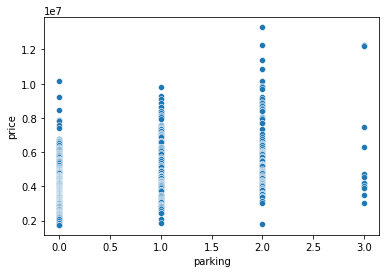

In [ ]:
sns.scatterplot(x = housing['parking'],y = housing['price'])

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [ ]:
# Defining the map function
def binary_map(x):return x.map({'yes': 1, "no": 0})

In [ ]:
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Dummy Variables

In [ ]:
status = pd.get_dummies(housing['furnishingstatus'])

In [ ]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows,respectively
np.random.seed(0)
X = housing.drop('price', axis=1)
y = housing.price.copy()
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 100)

     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1         0          0         0   
544  3850         3          1        2         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  semi-furnished  \
0                  0               

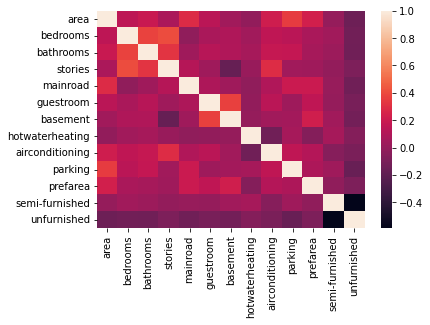

In [ ]:
sns.heatmap(X.corr())
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.predict(X_test)

array([ 4200000,  7140000,  5145000,  5523000,  4130000,  4550000,
        9100000,  4200000,  2450000,  6090000,  3255000,  5740000,
        3885000,  3920000,  5250000,  4620000, 13300000,  4900000,
        5950000,  4550000,  4375000,  3234000,  4550000,  3710000,
        3360000,  3675000,  5565000,  5530000,  6020000,  3920000,
        2961000,  4130000,  2940000,  2345000,  5145000,  4200000,
        7455000,  3710000,  3675000,  4900000,  3150000,  3640000,
        5950000,  3836000,  3360000,  3605000,  3850000,  3640000,
        3850000,  5250000,  2135000,  5775000,  6160000,  4690000,
        6650000,  5033000,  6020000,  3290000,  2590000,  3500000,
        3836000,  4655000,  6160000,  5880000,  2940000,  2520000,
        7000000,  3255000,  4270000,  5600000,  1855000,  5460000,
        4585000,  4375000,  3920000,  4193000,  5600000,  8960000,
       13300000,  3395000,  7350000,  2660000,  3780000,  2940000,
        4270000,  4060000,  4375000,  7700000,  4613000,  2520

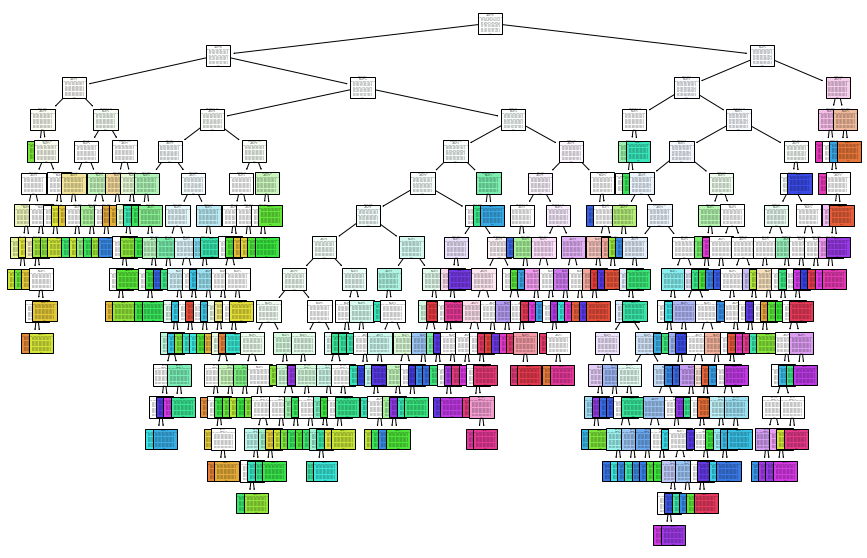

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))
plot_tree(rfc.estimators_[0],feature_names=housing.columns,
         filled=True)
plt.show()

In [ ]:
rfc.score(X_test,y_test)

0.03048780487804878